In [2]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-19 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART12_Annotation_Fibro'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

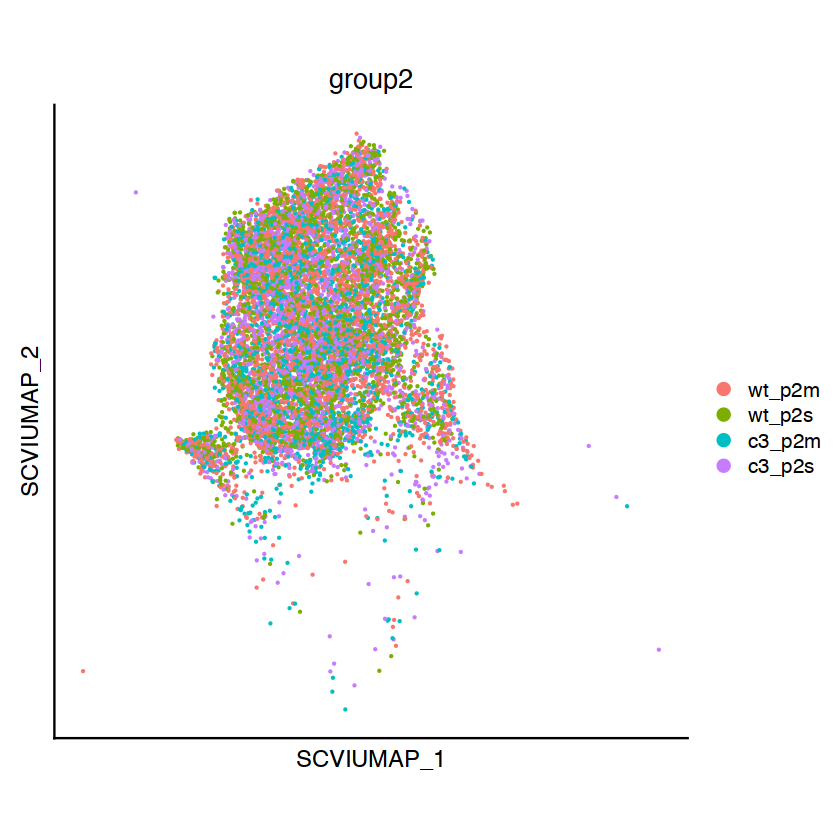

In [3]:
plan("multisession", workers = 8)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART10.annotated.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Excitatory Neuron annotation  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
sub.srt <- srt[, srt$Cell_type %in% c('Fibroblast')]
DimPlot2(sub.srt, group.by = 'group2')
mycol_sample <- mycol_10[1:4]

In [5]:
## Re-embed by scVI
sub.srt <- RunUMAP(sub.srt, reduction = 'scVI', dims = 1:50,
                  reduction.name = 'sub_scVI_umap', reduction.key = 'subSCVIUMAP_', verbose = FALSE)
sub.srt <- FindNeighbors(sub.srt, dims = 1:50, reduction = 'scVI', force.recalc = T, verbose = FALSE) %>%
        FindClusters(resolution = seq(0.1, 1, 0.1), verbose = FALSE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


In [6]:
p <- list(
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'group2', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Doublet_SC', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Cell_type', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.1', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.2', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.3', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.4', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.5', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.6', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.7', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.8', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.9', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.1', raster = T, pt.size = 0.2, label = T)
)
p <- wrap_plots(p, nrow = 4)
PlotPDF('1.0.umap.clusters', 20, 20)
p
dev.off()

pdf 
  2

In [8]:
## Annotate
Idents(sub.srt) <- 'RNA_snn_res.0.2'
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.5)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('1.1.heat.marker_all_cluster', 15, 15)
p
dev.off()

PlotPDF('1.2.dim.all_cluster', 10, 10)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)
dev.off()

PlotPDF('1.3.bar.doublet_in_all_cluster', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'RNA_snn_res.0.2', stack.var = 'Doublet_SC', percentage = T)
dev.off()

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

pdf 
  2

`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 10 × 3
# Groups:   StackVar [2]
   StackVar GroupVar Count
   <lgl>    <fct>    <int>
 1 FALSE    0         3120
 2 FALSE    1         3106
 3 FALSE    2         2010
 4 FALSE    3          717
 5 FALSE    4          353
 6 TRUE     0           82
 7 TRUE     1           94
 8 TRUE     2           40
 9 TRUE     3           73
10 TRUE     4          120


pdf 
  2

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Score_Doublet"


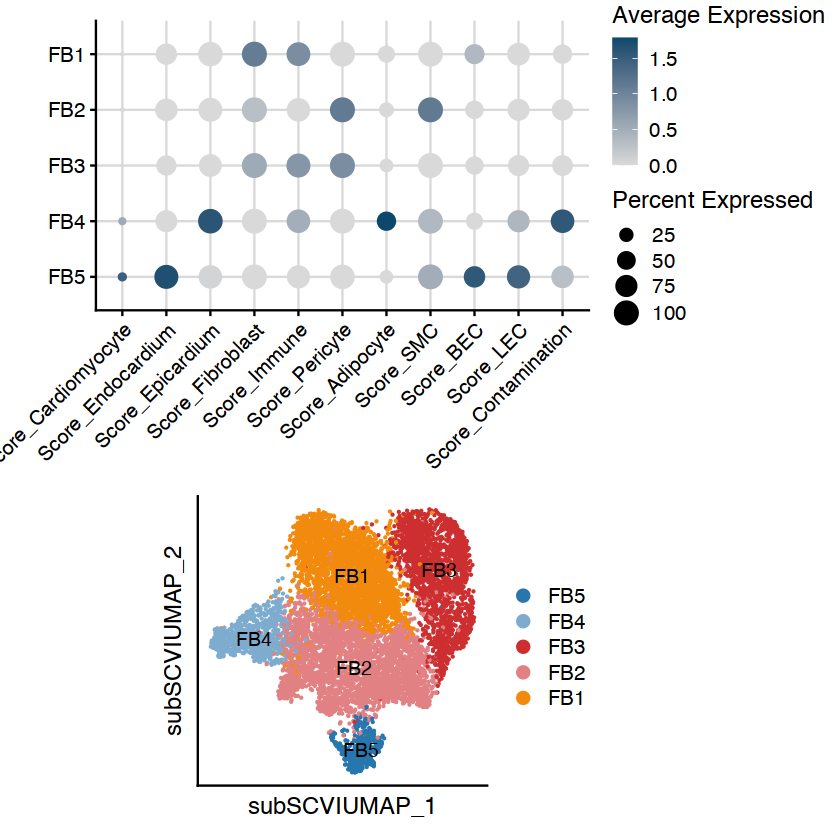

In [23]:
## Re-annotate
#Idents(sub.srt) <- 'RNA_snn_res.0.2'

sub.srt$Cell_state <- NA

sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(0)] <- 'FB1'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(1)] <- 'FB2'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(2)] <- 'FB3'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(3)] <- 'FB4'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(4)] <- 'FB5'


Idents(sub.srt) <- 'Cell_state'
DotPlot2(sub.srt, features = paste0('Score_', levels(sub.srt$Cell_type)), group.by = 'Cell_state', col.min = 0) /
        DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)

In [24]:
gl <- Table(srt$Cell_type)
p <- FeaturePlot2(sub.srt, features = paste0('Score_', names(gl)), raster = T, min.cutoff = 0, max.cutoff = 4, ncol = 5)
PlotPDF('1.4.feat.cell_type_score', 30, 20)
p
dev.off()

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Score_Doublet"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will 

pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




 FB1  FB2  FB3  FB4  FB5 
3202 3200 2050  790  473 

pdf 
  2

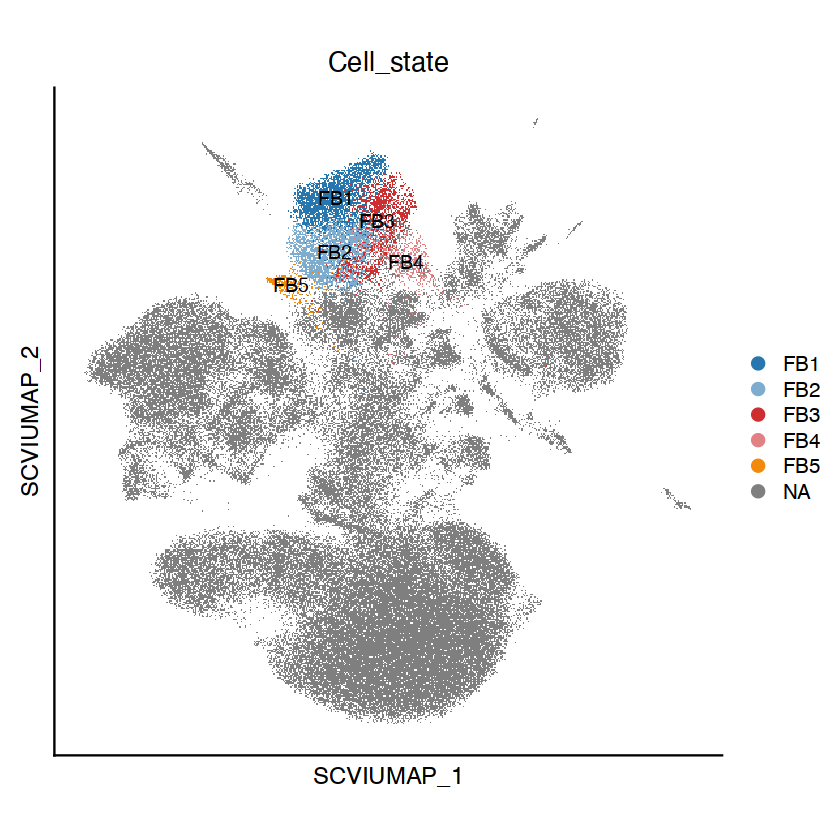

In [25]:
srt$Cell_state <- NA
srt$Cell_state[Cells(sub.srt)] <- sub.srt$Cell_state
DimPlot2(srt, reduction = 'scVI_umap', label = T, cols = mycol_20, group.by = 'Cell_state')

Table(sub.srt$Cell_state)


sub.srt$Cell_state <- factor(sub.srt$Cell_state, levels = c(
        'FB1',
        'FB2',
        'FB3',
        'FB4',
        'FB5'
))
Idents(sub.srt) <- 'Cell_state'
  
PlotPDF('2.dim.all_cluster_annotated', 8, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state')
dev.off()

In [26]:
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.25)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('3.heat.maker_all_cluster', 15, 15)
p
dev.off()

WriteCSV(mk, title = 'cell_subtype_markers')

Calculating cluster FB1

Calculating cluster FB2

Calculating cluster FB3

Calculating cluster FB4

Calculating cluster FB5

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

In [27]:
## Re-embed without ambiguous cells
fb.srt <- sub.srt
fb.srt2 <- fb.srt[, fb.srt$Cell_state != 'Doublet']
fb.srt2 <- RunUMAP(fb.srt2, reduction = 'scVI', dims = 1:50, min.dist = 0.5,
                   reduction.name = 'sub_clean_scVI_umap', reduction.key = 'subcleanSCVIUMAP_', verbose = FALSE)
fb.srt@reductions$sub_clean_scVI_umap <- fb.srt@reductions$sub_scVI_umap
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[, c(1,2)] <- NA
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[Cells(fb.srt2), c(1,2)] <-
        fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings
colnames(fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings) <-
        colnames(fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings)
fb.srt@reductions$sub_clean_scVI_umap@key <- fb.srt2@reductions$sub_clean_scVI_umap@key
PlotPDF('4.umap.Re_embed_annotated_reembed', 6, 6)
DimPlot2(fb.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)
dev.off()
sub.srt <- fb.srt

pdf 
  2

In [28]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
saveRDS(sub.srt, 'integrated/PART12.fibro_cells.srt.rds')

In [29]:
sub.srt <- DietSeurat(sub.srt, dimreducs = 'sub_scVI_umap', assay = 'RNA')
SaveH5ad(sub.srt, path = 'integrated/', name = 'PART12.annotated_fibro.gex.ann',
         assay = 'RNA', raw_count_only = T, verbose = T)

## Following code is for avoiding "_index" in adata.var bug
suppressMessages(library('anndata'))
adata <- read_h5ad('integrated/PART12.annotated_fibro.gex.ann.h5ad')
adata$raw <- NULL
adata$write_h5ad(filename = 'integrated/PART12.annotated_fibro.gex.ann.h5ad') ## replace the original
adata$X[1:10, 1:20]
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Raw matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:GAGTGAGGTTTGTTGG-1', '2023_NeoC3KO_RLi:P01_S001:AGGCCACTCCACCCTA-1', '2023_NeoC3KO_RLi:P01_S001:TTCCTTCTCTGCCTGT-1' ... ]]



                                  
Xkr4          15 2 . . 1 3 . 8 2 5
Gm1992         . . . . . . . . . 1
Gm19938        . . . . . . . . . 1
Gm37381        . . . . . . . . . .
Rp1            . . . . . . . . . .
Sox17          . . . . . . . . . .
Gm37587        . . . . . . . . . .
Gm37323        . . . . . . . . . .
Mrpl15         . . 1 . 1 1 . . . .
Lypla1         . . 1 . . . . . . .
Tcea1          2 . . . 3 1 3 2 . .
Rgs20          . . . . . . . . . .
Atp6v1h        1 2 . . 2 . 2 1 1 1
Rb1cc1         1 3 4 4 . 1 1 2 . 1
4732440D04Rik  . 1 1 3 . . . . . .
Alkal1         . . . . . . . . . .
St18           . . . . . . . . . .
Pcmtd1         3 2 2 2 1 1 2 3 1 2
Gm26901        . . . . . . . . . .
Gm30414        . . . . . . . . . .


Data matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:GAGTGAGGTTTGTTGG-1', '2023_NeoC3KO_RLi:P01_S001:AGGCCACTCCACCCTA-1', '2023_NeoC3KO_RLi:P01_S001:TTCCTTCTCTGCCTGT-1' ... ]]



                                  
Xkr4          15 2 . . 1 3 . 8 2 5
Gm1992         . . . . . . . . . 1
Gm19938        . . . . . . . . . 1
Gm37381        . . . . . . . . . .
Rp1            . . . . . . . . . .
Sox17          . . . . . . . . . .
Gm37587        . . . . . . . . . .
Gm37323        . . . . . . . . . .
Mrpl15         . . 1 . 1 1 . . . .
Lypla1         . . 1 . . . . . . .
Tcea1          2 . . . 3 1 3 2 . .
Rgs20          . . . . . . . . . .
Atp6v1h        1 2 . . 2 . 2 1 1 1
Rb1cc1         1 3 4 4 . 1 1 2 . 1
4732440D04Rik  . 1 1 3 . . . . . .
Alkal1         . . . . . . . . . .
St18           . . . . . . . . . .
Pcmtd1         3 2 2 2 1 1 2 3 1 2
Gm26901        . . . . . . . . . .
Gm30414        . . . . . . . . . .


Scaled Data matrix:

No scaled data slot

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for sub_scVI_umap

No loadings for sub_scVI_umap

No projected loadings for sub_scVI_umap

No standard deviations for sub_scVI_umap

No JackStraw data for sub_scVI_umap

Validating h5Seurat file

Adding data from RNA as X

Transfering meta.features to var

Adding counts from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for sub_scVI_umap



None

  [[ suppressing 20 column names 'Xkr4', 'Gm1992', 'Gm19938' ... ]]



10 x 20 sparse Matrix of class "dgTMatrix"
                                                                               
2023_NeoC3KO_RLi:P01_S001:GAGTGAGGTTTGTTGG-1 15 . . . . . . . . . 2 . 1 1 . . .
2023_NeoC3KO_RLi:P01_S001:AGGCCACTCCACCCTA-1  2 . . . . . . . . . . . 2 3 1 . .
2023_NeoC3KO_RLi:P01_S001:TTCCTTCTCTGCCTGT-1  . . . . . . . . 1 1 . . . 4 1 . .
2023_NeoC3KO_RLi:P01_S001:GTGGAAGTCATACGAC-1  . . . . . . . . . . . . . 4 3 . .
2023_NeoC3KO_RLi:P01_S001:CTAGACACAAATACAG-1  1 . . . . . . . 1 . 3 . 2 . . . .
2023_NeoC3KO_RLi:P01_S001:TCCATGCAGAAATTGC-1  3 . . . . . . . 1 . 1 . . 1 . . .
2023_NeoC3KO_RLi:P01_S001:ACTGTGAAGTGACCTT-1  . . . . . . . . . . 3 . 2 1 . . .
2023_NeoC3KO_RLi:P01_S001:ACCAACATCTTGTTAC-1  8 . . . . . . . . . 2 . 1 2 . . .
2023_NeoC3KO_RLi:P01_S001:GCCCAGAGTTGGCCTG-1  2 . . . . . . . . . . . 1 . . . .
2023_NeoC3KO_RLi:P01_S001:TCTTCCTTCTAATTCC-1  5 1 1 . . . . . . . . . 1 1 . . .
                                                  
2023_NeoC3KO_RLi:P01_S001:

In [30]:
sub.srt <- readRDS(file = 'integrated/PART12.fibro_cells.srt.rds')
sub.srt <- sub.srt[, !sub.srt$Cell_state %in% c('Doublet')]

In [31]:
PlotPDF('4.1.0.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'Cell_state', stack.var = 'group1', percentage = T)
dev.off()

`summarise()` has grouped output by 'group1'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 40 × 3
# Groups:   StackVar [8]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 wt_p2m1  FB1        678
 2 wt_p2m1  FB2        620
 3 wt_p2m1  FB3        460
 4 wt_p2m1  FB4        179
 5 wt_p2m1  FB5        108
 6 wt_p2m2  FB1        256
 7 wt_p2m2  FB2        253
 8 wt_p2m2  FB3        209
 9 wt_p2m2  FB4        105
10 wt_p2m2  FB5         35
# … with 30 more rows


pdf 
  2

In [32]:
PlotPDF('4.2.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2

In [33]:
PlotPDF('4.1.1.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group1', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 40 × 3
# Groups:   StackVar [5]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 FB1      wt_p2m1    678
 2 FB1      wt_p2m2    256
 3 FB1      wt_p2s1    454
 4 FB1      wt_p2s2    334
 5 FB1      c3_p2m1    530
 6 FB1      c3_p2m2    114
 7 FB1      c3_p2s1    617
 8 FB1      c3_p2s2    219
 9 FB2      wt_p2m1    620
10 FB2      wt_p2m2    253
# … with 30 more rows


pdf 
  2

In [34]:
PlotPDF('4.1.2.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group2', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 20 × 3
# Groups:   StackVar [5]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 FB1      wt_p2m     934
 2 FB1      wt_p2s     788
 3 FB1      c3_p2m     644
 4 FB1      c3_p2s     836
 5 FB2      wt_p2m     873
 6 FB2      wt_p2s     710
 7 FB2      c3_p2m     784
 8 FB2      c3_p2s     833
 9 FB3      wt_p2m     669
10 FB3      wt_p2s     608
11 FB3      c3_p2m     406
12 FB3      c3_p2s     367
13 FB4      wt_p2m     284
14 FB4      wt_p2s     169
15 FB4      c3_p2m     126
16 FB4      c3_p2s     211
17 FB5      wt_p2m     143
18 FB5      wt_p2s     121
19 FB5      c3_p2m     107
20 FB5      c3_p2s     102


pdf 
  2

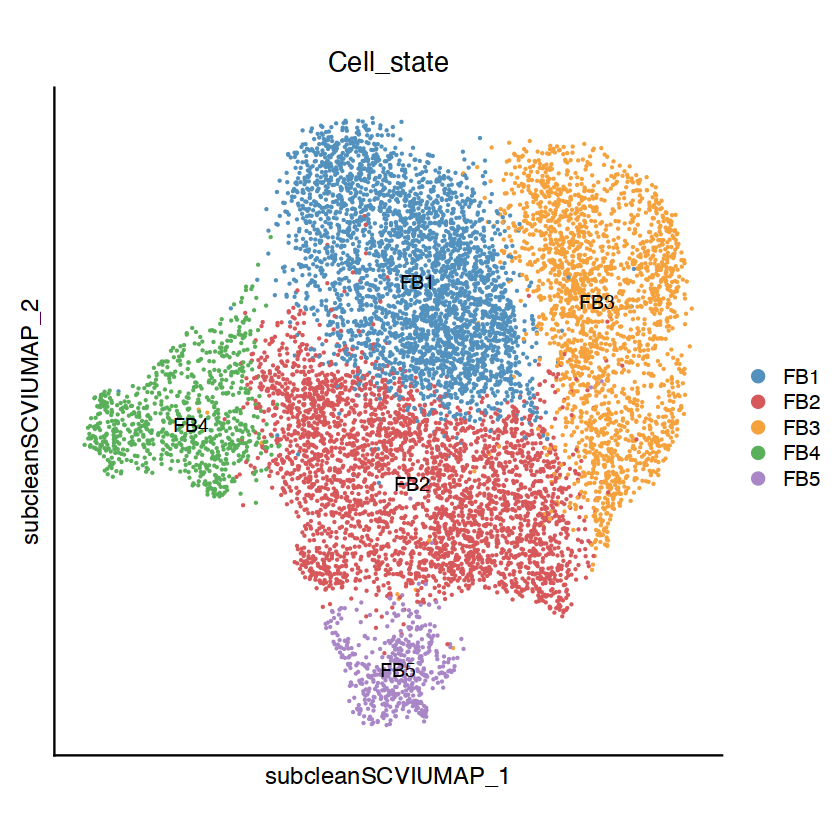

In [35]:
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)

In [36]:
PlotPDF('4.4.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2

In [37]:
PlotPDF('06.1.dotplot.c3', 12, 12)
p1 <- DotPlot2(sub.srt[, !sub.srt$RNA_snn_res.1 %in% c(16,18)], features = c('C3','Upk3b','Col1a1'),group.by = 'RNA_snn_res.1',split.by = 'genotype',cols = 'RdYlBu')
p2 <- DotPlot2(sub.srt, features = c('C3','Upk3b','Col1a1'),group.by = 'RNA_snn_res.1',split.by = 'genotype',cols = 'RdYlBu')
p1 | p2
dev.off()

pdf 
  2

In [38]:
PlotPDF('06.2.vlnplot.c3', 12, 12)
VlnPlot2(sub.srt, features = c('C3','Upk3b','Col1a1'),group.by = 'RNA_snn_res.1',split.by = 'genotype', ncol = 2)
dev.off()

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



pdf 
  2

In [39]:
Table(sub.srt$genotype)


C3KO   WT 
4416 5299 

In [40]:
PlotPDF('06.3.featurescatter.c3', 12, 6)
p1 <- FeatureScatter(sub.srt[, sub.srt$genotype %in% c('C3KO')], feature1 = 'C3', feature2 = 'Upk3b')
p2 <- FeatureScatter(sub.srt[, sub.srt$genotype %in% c('WT')], feature1 = 'C3', feature2 = 'Upk3b')
p1 | p2
dev.off()

pdf 
  2

In [41]:
PlotPDF('06.3.featurescatter.c3', 12, 6)
p1 <- FeatureScatter(sub.srt, feature1 = 'C3', feature2 = 'Upk3b')
p2 <- FeatureScatter(object = sub.srt, feature1 = 'C3', feature2 = 'Col1a1')
p1 | p2
dev.off()

pdf 
  2